In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, log_loss
)

from sklearn import metrics

In [3]:
df = pd.read_csv('fetal_health.csv') # Fetal Health Classification
df.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.iloc[:, 0:21].values # Features
Y = df.iloc[:, 21].values # Labels

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=0
)
# 80/20 split

In [6]:
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 1700
Test samples: 426


In [7]:
sc_X = StandardScaler() # Create scaler object
X_train = sc_X.fit_transform(X_train) # Fit to training data and transform
X_test  = sc_X.transform(X_test) # Transform test data using same scaler
print("Train mean (first 5):", X_train.mean(axis=0)[:5])
print("Train std  (first 5):", X_train.std(axis=0, ddof=0)[:5])

Train mean (first 5): [ 5.76140443e-16  4.90202650e-15 -1.13732553e-16  1.51943817e-14
  5.76264526e-15]
Train std  (first 5): [1. 1. 1. 1. 1.]


In [23]:
# Train a logistic regression model on the scaled training data
classifier = LogisticRegression(random_state=0, class_weight = 'balanced')
classifier.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
Y_pred = classifier.predict(X_test)

In [25]:
Y_pred[0:100]

array([1., 1., 1., 2., 2., 1., 1., 1., 1., 2., 3., 1., 1., 1., 1., 1., 2.,
       1., 1., 2., 1., 1., 1., 3., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 2., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 2.,
       1., 1., 2., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 3.])

In [26]:
print("Predictions (first 10):", Y_pred[:20])
print("Actual (first 10):     ", Y_test[:20])

Predictions (first 10): [1. 1. 1. 2. 2. 1. 1. 1. 1. 2. 3. 1. 1. 1. 1. 1. 2. 1. 1. 2.]
Actual (first 10):      [1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 3. 1. 1. 1. 1. 1. 1. 1. 1. 2.]


In [27]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[279,  34,  13],
       [  8,  45,   5],
       [  1,   7,  34]])

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Accuracy: overall correct predictions
print("Accuracy:", accuracy_score(Y_test, Y_pred))

# Precision, Recall, F1 for each class (macro = unweighted average)
print("Precision (macro):", precision_score(Y_test, Y_pred, average='macro'))
print("Recall (macro):", recall_score(Y_test, Y_pred, average='macro'))
print("F1 Score (macro):", f1_score(Y_test, Y_pred, average='macro'))

# Detailed report per class
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.8403755868544601
Precision (macro): 0.7152839892665473
Recall (macro): 0.8137380331160742
F1 Score (macro): 0.7523996811975882

Classification Report:
               precision    recall  f1-score   support

         1.0       0.97      0.86      0.91       326
         2.0       0.52      0.78      0.62        58
         3.0       0.65      0.81      0.72        42

    accuracy                           0.84       426
   macro avg       0.72      0.81      0.75       426
weighted avg       0.88      0.84      0.85       426



Text(0.5, 427.9555555555555, 'Predicted Label')

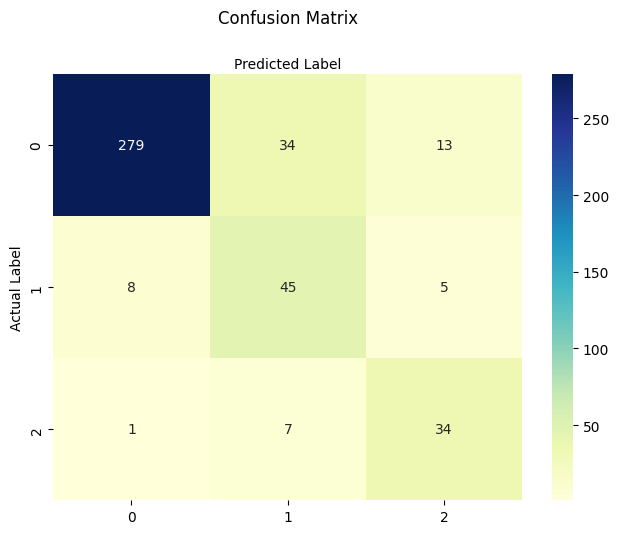

In [29]:
# Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.
# Here, you will visualize the confusion matrix using Heatmap.
class_names=[1, 2, 3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')